### Project Phase 0
#### Mohammad Amin Rami 98101588
#### Milad Heidari 98101469
#### Mohammad Reza Safavi 98106701

In [1]:
from pyturk.datasets import MSCTD
import torch
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import cv2
from tqdm.notebook import tqdm
from torchvision.io import read_image
from itertools import groupby

In [2]:
train_dataset = MSCTD(
    root='data',
    mode='train',
    download=False
)

dev_dataset = MSCTD(
    root='data',
    mode='dev',
    download=False
)

test_dataset = MSCTD(
    root='data',
    mode='test',
    download=False
)

INFO:root:opening and reading files...
INFO:root:finished reading files...
INFO:root:done...
INFO:root:opening and reading files...
INFO:root:finished reading files...
INFO:root:done...
INFO:root:opening and reading files...
INFO:root:finished reading files...
INFO:root:done...


In [3]:
train_dataset[0]

({'images': [tensor([[[22, 21, 21,  ..., 24, 22, 21],
            [22, 22, 22,  ..., 24, 22, 21],
            [23, 23, 23,  ..., 23, 22, 21],
            ...,
            [ 4,  4,  4,  ..., 49, 50, 50],
            [ 4,  4,  4,  ..., 49, 50, 50],
            [ 4,  4,  4,  ..., 50, 50, 50]],
   
           [[18, 17, 17,  ..., 25, 23, 22],
            [18, 18, 18,  ..., 25, 23, 22],
            [19, 19, 19,  ..., 24, 23, 22],
            ...,
            [ 5,  5,  5,  ..., 51, 52, 52],
            [ 5,  5,  5,  ..., 51, 52, 52],
            [ 5,  5,  5,  ..., 52, 52, 52]],
   
           [[ 9,  8,  8,  ..., 19, 17, 16],
            [ 9,  9,  9,  ..., 19, 17, 16],
            [10, 10, 10,  ..., 18, 17, 16],
            ...,
            [ 0,  0,  0,  ..., 46, 47, 47],
            [ 0,  0,  0,  ..., 46, 47, 47],
            [ 0,  0,  0,  ..., 49, 49, 49]]], dtype=torch.uint8),
   tensor([[[23, 22, 21,  ..., 26, 27, 26],
            [23, 22, 21,  ..., 26, 27, 27],
            [22, 22, 21,  .

#### A) Histogram for classes

In [4]:
labels = []
for _, label_set in train_dataset:
    for label in label_set:
        labels.append(label)

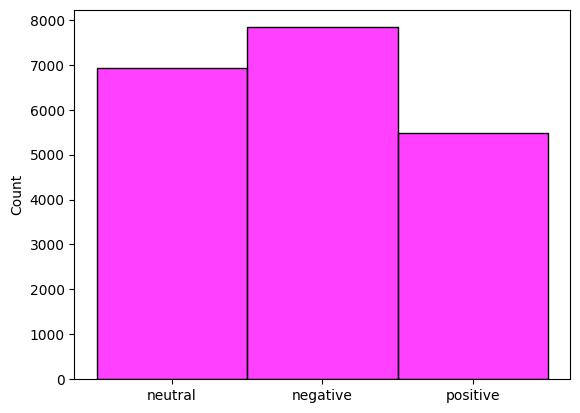

In [5]:
label_map = {
    '0': 'neutral',
    '1': 'negative',
    '2': 'positive'
}

sns.histplot([label_map[x] for x in labels], color='magenta');

#### B) Histogram, mean and variance of number of words in sentences

In [6]:
sentence_lengths = []
for data, _ in train_dataset:
    for sentence in data['texts']:
        sentence_lengths.append(len(sentence.split(' ')))

In [7]:
print(f'mean: {np.round(np.mean(sentence_lengths), 3)}')
print(f'variance: {np.round(np.var(sentence_lengths), 3)}')

mean: 6.464
variance: 9.247


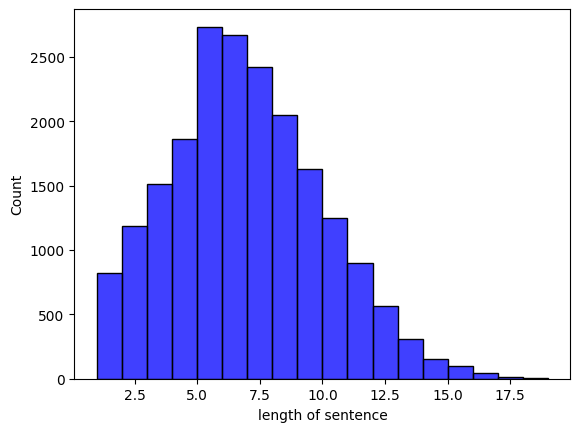

In [8]:
sns.histplot(sentence_lengths, binwidth=1, color='blue')
plt.xlabel('length of sentence');

#### C) Histogram, mean and variance of number of images in each conversation

In [9]:
num_images = []
for data, _ in train_dataset:
    num_images.append(len(data['images']))

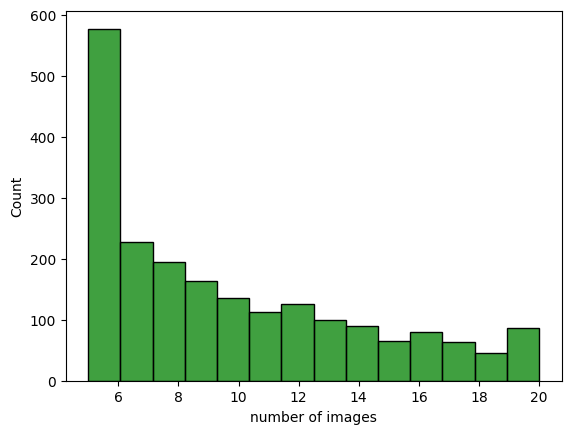

In [10]:
sns.histplot(num_images, color='green')
plt.xlabel('number of images');

In [11]:
print(f'mean: {np.round(np.mean(num_images), 3)}')
print(f'variance: {np.round(np.var(num_images), 3)}')

mean: 9.797
variance: 17.696


#### D) Histogram, mean and variance of number of faces in each image

In [12]:
num_faces = []
face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

In [13]:
for data, _ in tqdm(train_dataset):
    for image in data['images']:
        modified_image = image.permute(1, 2, 0).numpy()
        gray_img = cv2.cvtColor(modified_image, cv2.COLOR_RGB2GRAY)
        num_faces.append(len(face_detector.detectMultiScale(gray_img, 1.1, 9)))

  0%|          | 0/2066 [00:00<?, ?it/s]

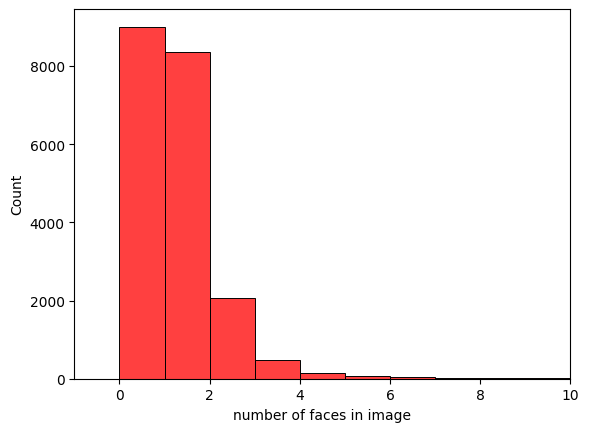

In [14]:
sns.histplot(num_faces, binwidth=1, color='red')
plt.xlim([-1, 10])
plt.xlabel('number of faces in image');

In [15]:
print(f'average number of faces in images: {np.mean(num_faces)}')
print(f'variance of number of faces in images: {np.var(num_faces)}')

average number of faces in images: 0.7935770750988143
variance of number of faces in images: 1.5868362163914447


#### E) Histogram of length of sentences for each sentiment

In [16]:
neutral_list = []
negative_list = []
positive_list = []

for data, labels in train_dataset:
    for i, sentence in enumerate(data['texts']):
        sentence_len = len(sentence.split(' '))
        match labels[i]:
            case '0':
                neutral_list.append(sentence_len)
            case '1':
                negative_list.append(sentence_len)
            case '2':
                positive_list.append(sentence_len)

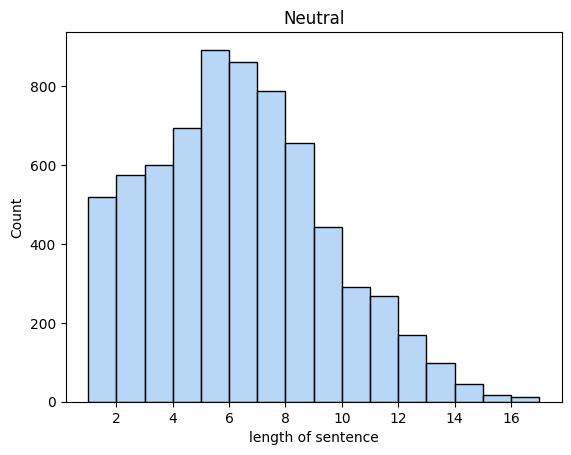

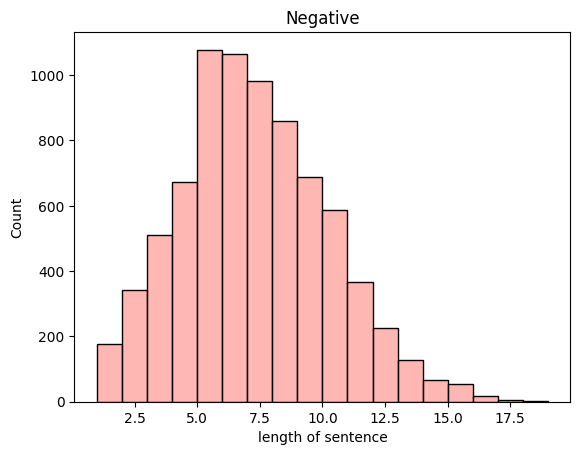

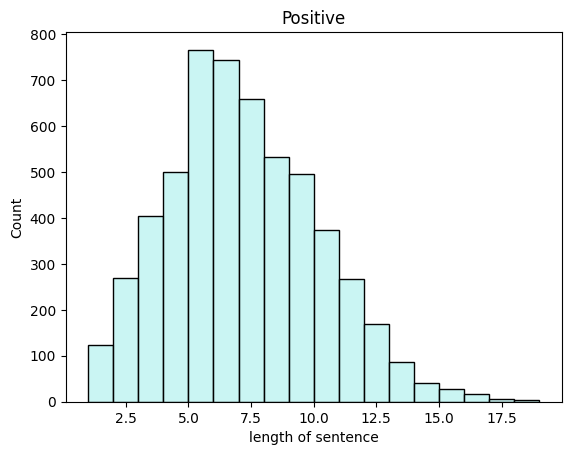

In [17]:
plt.figure()
sns.histplot(neutral_list, binwidth=1, color='#a1c9f4')
plt.title('Neutral')
plt.xlabel('length of sentence');

plt.figure()
sns.histplot(negative_list, binwidth=1, color='#ff9f9b')
plt.title('Negative')
plt.xlabel('length of sentence');

plt.figure()
sns.histplot(positive_list, binwidth=1, color='#b9f2f0')
plt.title('Positive')
plt.xlabel('length of sentence');

#### F) Histogram of patterns in conversations

In [18]:
patterns = []

for i, (data, labels) in enumerate(train_dataset):
    pattern = ''.join([key for key, group in groupby(labels)])
    patterns.append(pattern)

In [19]:
print(f'There are {len(set(patterns))} unique patterns in the training set.')

There are 681 unique patterns in the training set.


INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


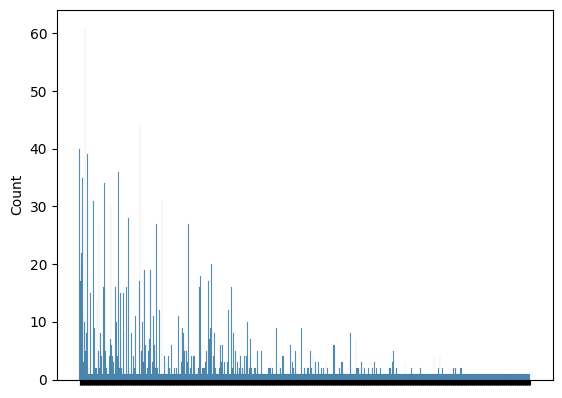

In [20]:
sns.histplot(patterns).set(xticklabels=[])
plt.xticks(rotation=-90);

#### There are 681 different patterns which makes it difficult to plot on one figure. Therefore we plot the first 20 patterns to get an intuition on distribution of data.

In [21]:
sample_patterns = []
sample_patterns_counts = []
sample_len = 20

for i in range(sample_len):
    pattern = patterns[i]
    sample_patterns.append(pattern)
    sample_patterns_counts.append(patterns.count(pattern))

INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
INFO:matplotlib.category:Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.


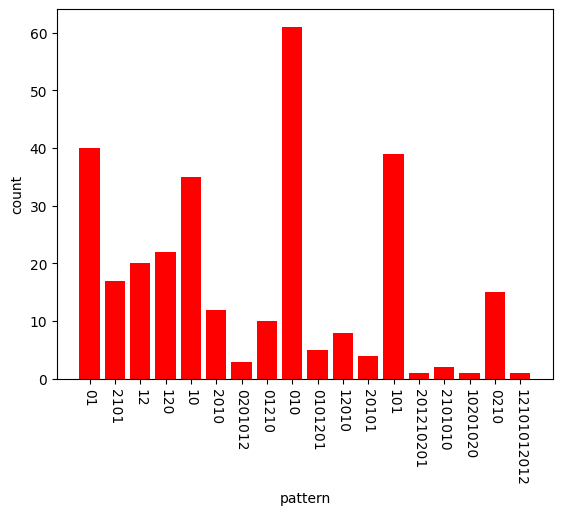

In [22]:
plt.figure()
plt.bar(sample_patterns, sample_patterns_counts, color='red')
plt.ylabel('count')
plt.xlabel('pattern')
plt.xticks(rotation=-90);

#### H) 
If we denote number of classes by `c` and the length of conversations as `d`, total number of patterns can be calculated as follows:
$$ $$
$$ \sum_{n=1}^{d}c(c-1)^{n-1} = \sum_{n=0}^{d-1}c(c-1)^{n} = c\frac{(c-1)^d - 1}{c-2}$$

In our case, d = 10 and c = 3, resulting in $3\frac{(2)^{10} - 1}{3-2} = 3069$ unique patterns which is larger than the result of the previous part.